## Задача 7. Jupyter

# Подготовка данных

импорт библиотек

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

загрузка данных

In [84]:
trains = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
len(trains), len(test)

(891, 418)

Отобразим данные с начала и с конца.

In [85]:
display(trains.head(2))
display(test.tail(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


конкатенация данных

Конкатенируем таблицы и преобразуем столбы `Survived`, `Pclass`, `Sex`, `Embarked` в категориальный тип.

In [86]:
trains_test = pd.concat([trains, test], ignore_index=True)
trains_test['Survived'] = trains_test['Survived'].astype('category')
trains_test['Pclass'] = trains_test['Pclass'].astype('category')
trains_test['Sex'] = trains_test['Sex'].astype('category')
trains_test['Embarked'] = trains_test['Embarked'].astype('category')

In [87]:
trains_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Анализ таблицы

Вывод базой информации о таблице.

In [88]:
trains_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 87.6+ KB


Вывод базовой статистики.

In [89]:
trains_test.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


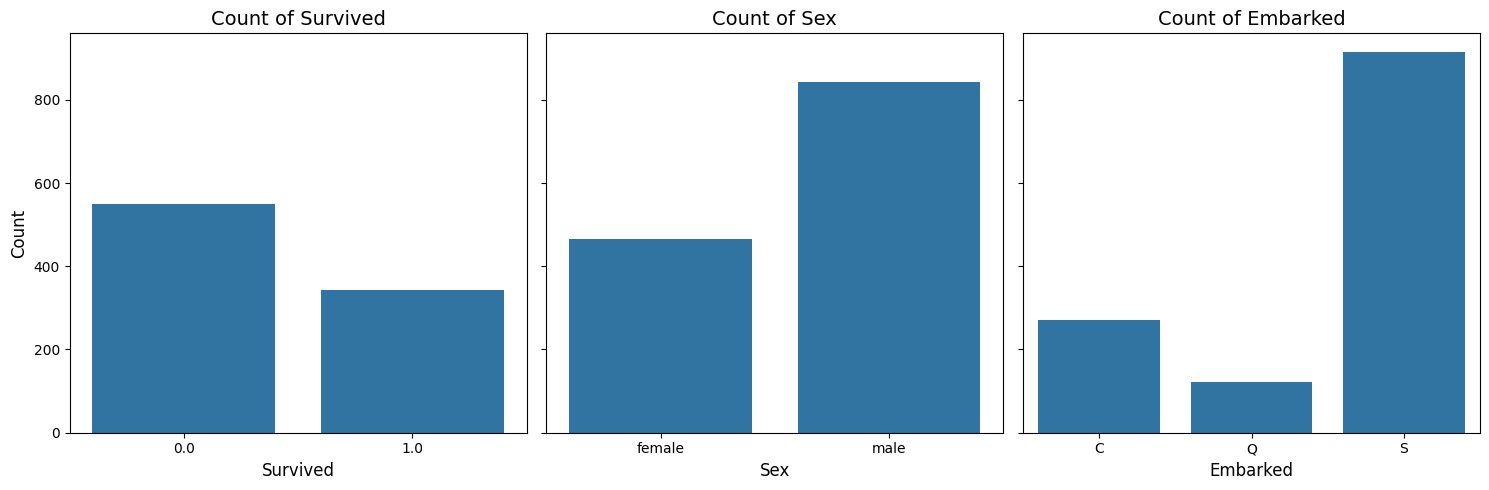

In [90]:
# List of categorical columns
columns = ['Survived', 'Sex', 'Embarked']

# Creating a shape for graphs
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5), sharey=True)

# Creating graphs for each category
for i, col in enumerate(columns):
    sns.countplot(data=trains_test, x=col, ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

*В каком классе больше всего пассажиров?*

<Axes: xlabel='Pclass', ylabel='count'>

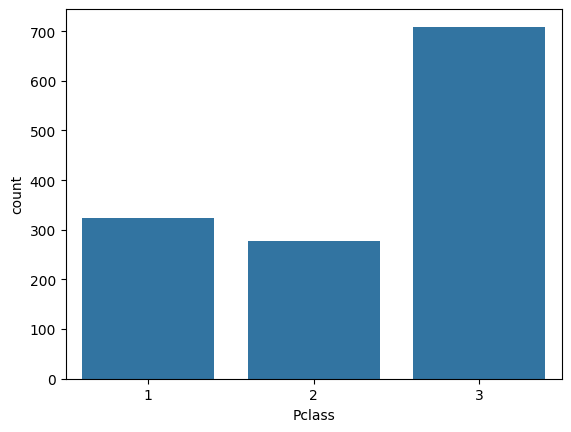

In [91]:
sns.countplot(x='Pclass', data=trains_test)

Больше всего пассажиров в `3` классе.

*Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?*

Групируем данные по `Pclass` и `Sex`, затем выбираем таблицу `Age` и считаем среднее.

In [92]:
class_sex_age = trains_test.groupby(['Pclass', 'Sex'])['Age'].mean()

<ipython-input-92-bb0369ba0dde>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Для корректного вывода используем `reset_index()`.

In [93]:
class_sex_age.reset_index()

,Pclass,Sex,Age
0,1,female,37.037594
1,1,male,41.029272
2,2,female,27.499223
3,2,male,30.815380
4,3,female,22.185329
5,3,male,25.962264


Берем минимальное и максимальное значение по группированным данным и выводим соответсвующие строки таблицы.

In [94]:
min_age = class_sex_age.min()
max_age = class_sex_age.max()
class_sex_age[class_sex_age.isin([min_age, max_age])]

,,Age
Pclass,Sex,
1,male,41.029272
3,female,22.185329


Самые **юные** - девушки из 3 класса

Самые **взрослые** - мужчиный из 1 класса

In [95]:
max_age-min_age

18.843942575810384

Разница возраста: `18.843942575810384`

*Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?*

In [96]:
survived_k_name = trains_test[(trains_test['Survived'] == 1) & (trains_test['Name'].str.startswith('K'))] # data selection
survived_k_name = survived_k_name.sort_values(by='Fare') # data sort
survived_k_name

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
300,301,1.0,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
303,304,1.0,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
691,692,1.0,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


Меньше всех заплатили `Kelly, Miss. Anna Katherine` и `Kelly, Miss. Mary`

Больше всех заплатил `Kimball, Mr. Edwin Nelson Jr`

*Какое максимальное количество родных было с выжившим пассажиром?*

Добавим в таблицу столбец с сумарным количеством родных. И выберем из него максимальное значение.

In [97]:
trains_test['Relatives'] = trains_test['SibSp'] + trains_test['Parch'] # adding the "Relatives" column
trains_test[trains_test['Survived'] == 1]['Relatives'].max()

6

Ответ: `6`

*Посчитайте среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана, во сколько раз они отличаются?*

Берем среднюю стоимость билета пассажирова с указанием и без указания кабины, после делим первое на второе.

In [98]:
mean_fare_with_cabine = trains_test[trains_test['Cabin'].notna()]['Fare'].mean() # mean value without NaN Cabin
mean_fare_without_cabine = trains_test[trains_test['Cabin'].isna()]['Fare'].mean() # mean value with NaN Cabin
mean_fare_with_cabine / mean_fare_without_cabine

4.282143526350037

Ответ: `4.282143526350037`

# Визуализация

Стоимость билета в зависимости от возраста и пола.

In [99]:
# creating and displaying an interactive point plot
fig = px.scatter(trains_test, x='Age', y='Fare', color='Sex', title="Scatter plot: Fare by Age and Sex")
fig.show()

Средний возраст в зависимости от порта и пола.

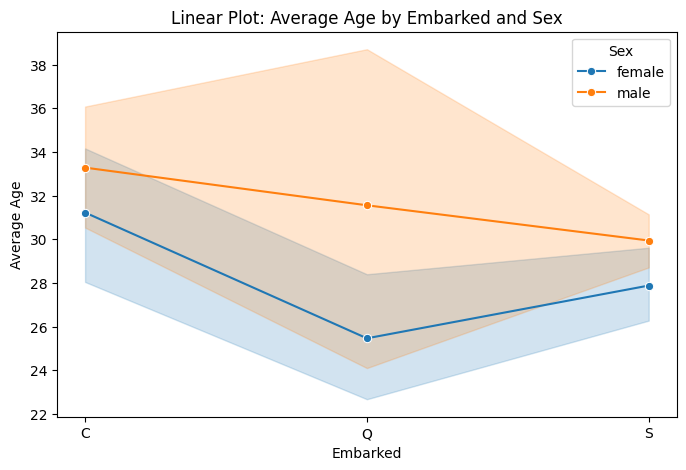

In [100]:
# set the size of the plot
plt.figure(figsize=(8, 5))

# creating and displaying linear plot
sns.lineplot(data=trains_test, x='Embarked', y='Age', hue='Sex', marker='o')
plt.title('Linear Plot: Average Age by Embarked and Sex')
plt.ylabel('Average Age')
plt.show()

Суммарная стоимость билетов в зависимости от возраста.

In [101]:
sum_fare_by_age = trains_test.groupby('Age')['Fare'].sum().reset_index() # data select and calculation

# creating and displaying an interactive linear plot
fig = px.line(sum_fare_by_age, x='Age', y='Fare', markers=True, title="Linear Plot: sum Fare by Age")
fig.update_traces(mode='markers+lines')
fig.show()

Графики суммарной стоимости билетов и количества пассажиров от пола.

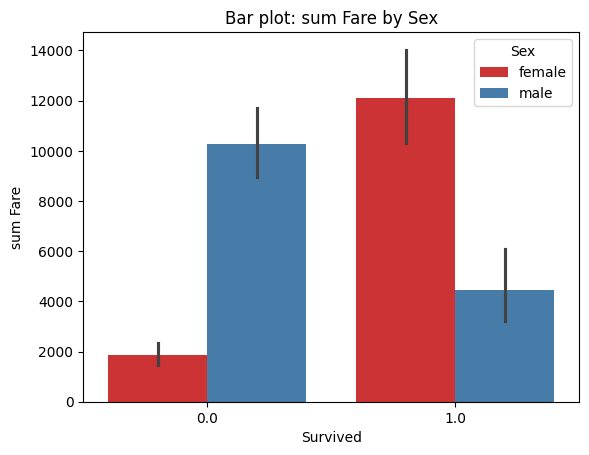

In [102]:
# creating and displaying bar plot
sns.barplot(data=trains_test, x='Survived', y='Fare', estimator='sum', hue='Sex', palette='Set1')
plt.title("Bar plot: sum Fare by Sex")
plt.ylabel("sum Fare")
plt.show()

Гистограмма распределения количества людей по возрасту и полу.

In [103]:
# creating and displaying an interactive histogram
fig = px.histogram(trains_test, x='Age', color='Sex', title="Histogram: Age Distribution")
fig.show()

Горизонтальная диаграмма количества пассажиров по классу и полу.

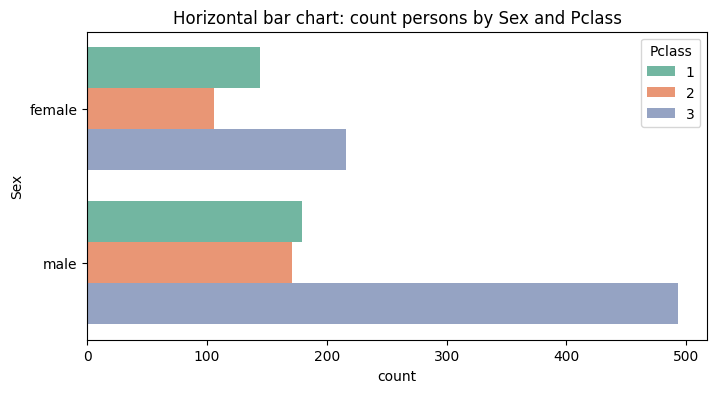

In [104]:
# creating and displaying horizontal bar chart
plt.figure(figsize=(8, 4))
fig = sns.countplot(data=trains_test, y='Sex', hue='Pclass', palette='Set2')
plt.title("Horizontal bar chart: count persons by Sex and Pclass")
plt.show()

Круговая диаграмма процента выживших.

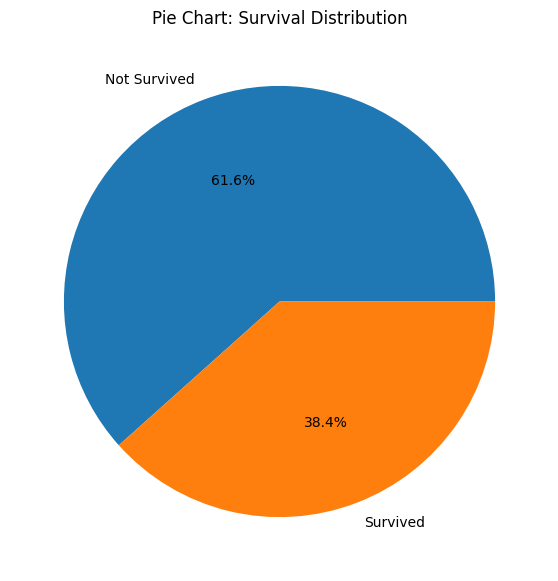

In [105]:
# set diagram size
plt.figure(figsize=(7, 7))

# creating and displaying pie chart
plt.pie(trains_test['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Pie Chart: Survival Distribution')
plt.show()

Коробчатая диаграмма по возрасту и классам.

In [106]:
# creating and displaying an interactive box chart
fig = px.box(trains_test, x='Pclass', y='Age', title="Box chart: Age Distribution by Pclass")
fig.show()

3d график по возрасту, порту и классу.

In [107]:
# creating and displaying an interactive 3D point plot
fig = px.scatter_3d(trains_test, x='Age', y='Embarked', z='Pclass', color='Embarked', title="3D point plot: Age, Embarked and Pclass")
fig.show()

Гистограмма плотности распределения стоимости билета.

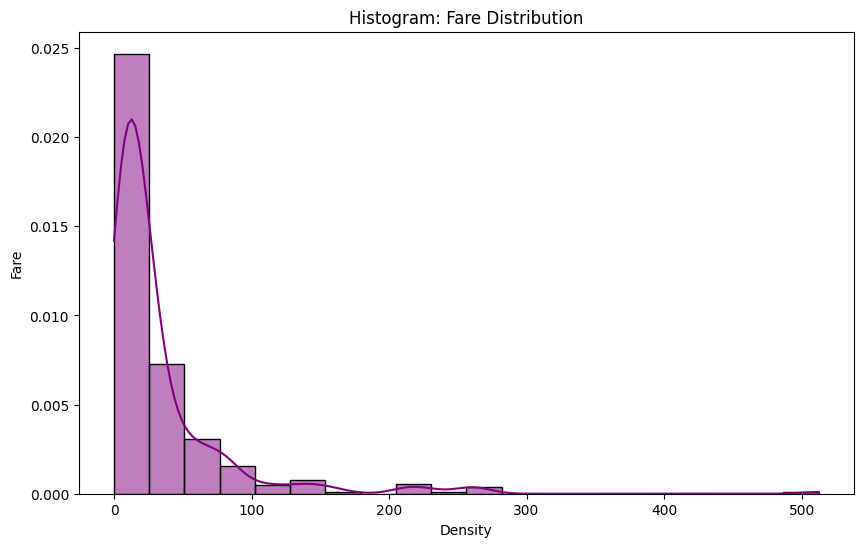

In [108]:
plt.figure(figsize=(10, 6))

# creating and displaying histogram
sns.histplot(trains_test['Fare'], kde=True, bins=20, color='purple', stat='density', orientation='horizontal')
plt.title('Histogram: Fare Distribution')
plt.ylabel('Fare')
plt.xlabel('Density')
plt.show()

Sunburst Chart (Диаграмма солнечных лучей) выживших по классу и полу.

In [109]:
# creating and displaying an interactive sunburst chart
fig = px.sunburst(trains_test.dropna(subset=['Pclass', 'Sex', 'Survived']), path=['Pclass', 'Sex', 'Survived'], title='Sunburst Chart: Survival by SibSp and Sex')
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Тепловая карта корреляции по возрасту, стоимости билета и количеству родственников


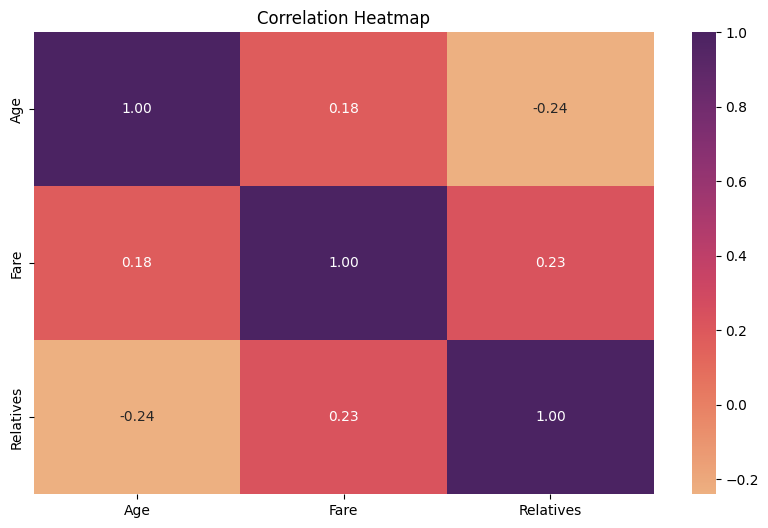

In [110]:
# select the desired numeric data
numeric_data = trains_test.drop(columns=['PassengerId', 'SibSp', 'Parch']).select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))

# creating and displaying heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Sankey Diagram в Plotly на данных датасета

Диаграмма sankey: потоки по возрастным категориям, полу и выживаемости.




In [111]:
import plotly.graph_objects as go

# Defining labels for nodes
labels = ['children', 'young',  'middle-aged', 'elderly', 'Male', 'Female', 'Survived', 'Not Survived']

# Indexes and values for sources and purposes
sources = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 4, 5]
targets = [4, 5, 4, 5, 4, 5, 4, 5, 6, 6, 7, 7]
values = [
    trains_test[(trains_test['Age'] <= 15) & (trains_test['Sex'] == 'male')].shape[0], # number of children-boys
    trains_test[(trains_test['Age'] <= 15) & (trains_test['Sex'] == 'female')].shape[0], # number of children-girls
    trains_test[(trains_test['Age'] > 15) & (trains_test['Age'] <= 30) & (trains_test['Sex'] == 'male')].shape[0], # number of young guys
    trains_test[(trains_test['Age'] > 15) & (trains_test['Age'] <= 30) & (trains_test['Sex'] == 'female')].shape[0], # number of young girls
    trains_test[(trains_test['Age'] > 30) & (trains_test['Age'] <= 50) & (trains_test['Sex'] == 'male')].shape[0], # number of middle-aged man
    trains_test[(trains_test['Age'] > 30) & (trains_test['Age'] <= 50) & (trains_test['Sex'] == 'female')].shape[0], # number of middle-aged woman
    trains_test[(50 < trains_test['Age']) & (trains_test['Sex'] == 'male')].shape[0], # number of elderly man
    trains_test[(50 < trains_test['Age']) & (trains_test['Sex'] == 'female')].shape[0], # number of elderly woman
    trains_test[(trains_test['Survived'] == 1) & (trains_test['Sex'] == 'male')].shape[0], # number of survived man
    trains_test[(trains_test['Survived'] == 1) & (trains_test['Sex'] == 'female')].shape[0], # number of survived woman
    trains_test[(trains_test['Survived'] == 0) & (trains_test['Sex'] == 'male')].shape[0], # number of not survived man
    trains_test[(trains_test['Survived'] == 0) & (trains_test['Sex'] == 'female')].shape[0], # number of not survived woman
]

# create diagramm
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=1),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))
fig.update_layout(title_text="Sankey Diagram: streams by age category, gender, and survival rate.")
fig.show()